In [ ]:

# Uninstall current numpy
!{sys.executable} -m pip uninstall numpy -y

# Install numpy 1.23.5 (compatible with TF 2.10)
!{sys.executable} -m pip install numpy==1.23.5

In [ ]:
# !python.exe -m pip install --upgrade pip

In [ ]:
# !pip uninstall torch torchvision torchaudio
# !pip uninstall -y --no-input torch torchvision torchaudio
# !pip uninstall -y --no-input tensorflow
# !pip uninstall -y --no-input numpy
# !pip uninstall -y --no-input keras


In [ ]:
# !pip install numpy --upgrade

In [ ]:
# !pip install --upgrade tensorflow
# !pip install keras --upgrade
# !pip install torch torchvision --index-url https://download.pytorch.org/whl/cu128
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124 --user

# !pip install  python-dotenv

In [ ]:
# !python -m ipykernel install --user --name=.venv

In [ ]:
# !pip uninstall tensorflow

In [ ]:
# !pip uninstall -y --no-input tensorflow


In [ ]:
!pip install tqdm
!pip install scikit-learn
!pip install "tensorflow==2.10"
!pip install "numpy<2" --force-reinstall
!pip install matplotlib
!pip install torch
!pip install opencv-python

In [ ]:
import os


import numpy as np
# import nibabel as ni
from sklearn.model_selection import train_test_split

# from sklearn.metrics import confusion_matrix, classification_report
# import seaborn as sn
# import pandas as pd
# import pickle
import tensorflow as tf
import sys

from tqdm import tqdm
import keras
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization,Conv2DTranspose,Concatenate,Input,Activation,Flatten,Dense
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from  tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import torch
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.utils import register_keras_serializable
# from scipy.io import loadmat
# import h5py
import cv2

In [ ]:
print("NumPy version:", np.__version__)

NumPy version: 2.2.6


In [ ]:
print("TensorFlow version:", tf.__version__)
print(tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.20.0
[]


In [ ]:
print("NumPy version:", np.__version__)
print("TensorFlow version:", tf.__version__)
print("GPUs:", tf.config.list_physical_devices('GPU'))

NumPy version: 2.2.6
TensorFlow version: 2.20.0
GPUs: []


In [ ]:
print("NumPy version:", np.__version__)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

In [ ]:
# import sys

# print("="*50)
# print("System Information")
# print("="*50)
# print(f"Python version: {sys.version}")
# print(f"PyTorch version: {torch.__version__}")
# print(f"CUDA available: {torch.cuda.is_available()}")
# print(f"CUDA version (PyTorch built with): {torch.version.cuda}")
# print(f"cuDNN version: {torch.backends.cudnn.version() if torch.cuda.is_available() else 'N/A'}")
# print(f"Number of GPUs: {torch.cuda.device_count()}")

# if torch.cuda.is_available():
#     print(f"GPU Name: {torch.cuda.get_device_name(0)}")
#     print(f"GPU Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.2f} GB")

In [9]:
tf.debugging.set_log_device_placement(True)

In [ ]:
# if torch.cuda.is_available():
#     print("CUDA is available! Device count:", torch.cuda.device_count())
#     device = torch.device("cuda")
# else:
#     print("CUDA not available, using CPU")
#     device = torch.device("cpu")

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [10]:
dataset = "D:\PythonProjects\TumorPrj\Segementation_1\Segementation_1"

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\SajanaNK\AppData\Local\Temp\ipykernel_11188\1034270525.py:1: SyntaxWarning: invalid escape sequence '\P'
  dataset = "D:\PythonProjects\TumorPrj\Segementation_1\Segementation_1"


In [11]:
image_files=sorted(os.listdir('D:\PythonProjects\TumorPrj\Segementation_1\Segementation_1\images'))
mask_files=sorted(os.listdir('D:\PythonProjects\TumorPrj\Segementation_1\Segementation_1\masks'))

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\SajanaNK\AppData\Local\Temp\ipykernel_11188\1759788127.py:1: SyntaxWarning: invalid escape sequence '\P'
  image_files=sorted(os.listdir('D:\PythonProjects\TumorPrj\Segementation_1\Segementation_1\images'))
C:\Users\SajanaNK\AppData\Local\Temp\ipykernel_11188\1759788127.py:2: SyntaxWarning: invalid escape sequence '\P'
  mask_files=sorted(os.listdir('D:\PythonProjects\TumorPrj\Segementation_1\Segementation_1\masks'))


In [12]:
print(image_files[:10])
print(mask_files[:10])

['1.png', '10.png', '100.png', '1000.png', '1001.png', '1002.png', '1003.png', '1004.png', '1005.png', '1006.png']
['1.png', '10.png', '100.png', '1000.png', '1001.png', '1002.png', '1003.png', '1004.png', '1005.png', '1006.png']


In [13]:
def display_image_mask(image_path,mask_path):
    count=0
    for image_file,mask_file in zip(image_files,mask_files):
        if count>=6:
            break
        image_path_full=os.path.join(image_path,image_file)
        mask_path_full=os.path.join(mask_path,mask_file)

        image=cv2.imread(image_path_full)
        mask=cv2.imread(mask_path_full,cv2.IMREAD_GRAYSCALE)

        if image is None:
                raise ValueError(f"Image at path {imagepath_full} could not be loaded")
        if mask is None:
                raise ValueError(f"Mask at path {maskpath_full} could not be loaded")

        mask_3ch=cv2.merge([mask,mask,mask])
        image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        plt.figure(figsize=(10,10))

        plt.subplot(1, 3, 1)
        plt.imshow(image)
        plt.title('Image')

        plt.subplot(1, 3, 2)
        plt.imshow(mask)
        plt.title('Mask')

        plt.subplot(1,3,3)
        overlay = cv2.addWeighted(image_rgb, 0.7, mask_3ch, 0.3, 0)
        plt.imshow(overlay)
        plt.title("Image with overlay")

        plt.show()
        count+=1

In [14]:
image_path='D:\PythonProjects\TumorPrj\Segementation_1\Segementation_1\images'
mask_path='D:\PythonProjects\TumorPrj\Segementation_1\Segementation_1\masks'

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\SajanaNK\AppData\Local\Temp\ipykernel_11188\1839659618.py:1: SyntaxWarning: invalid escape sequence '\P'
  image_path='D:\PythonProjects\TumorPrj\Segementation_1\Segementation_1\images'
C:\Users\SajanaNK\AppData\Local\Temp\ipykernel_11188\1839659618.py:2: SyntaxWarning: invalid escape sequence '\P'
  mask_path='D:\PythonProjects\TumorPrj\Segementation_1\Segementation_1\masks'


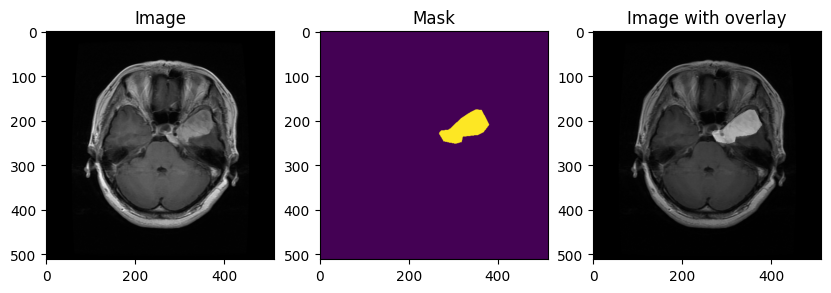

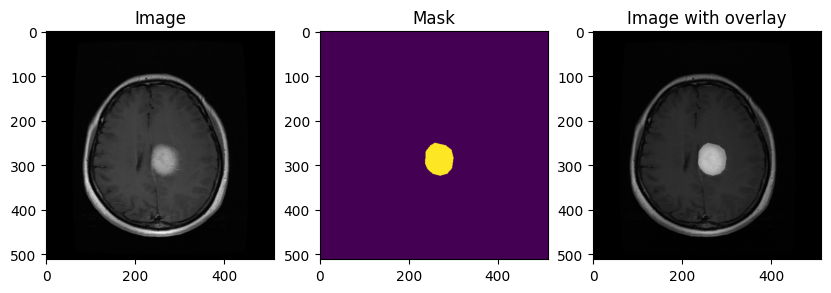

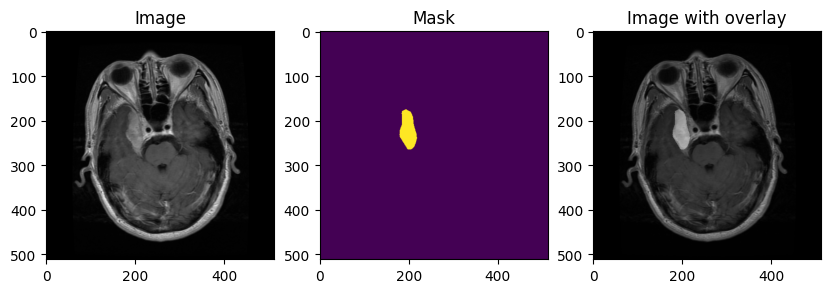

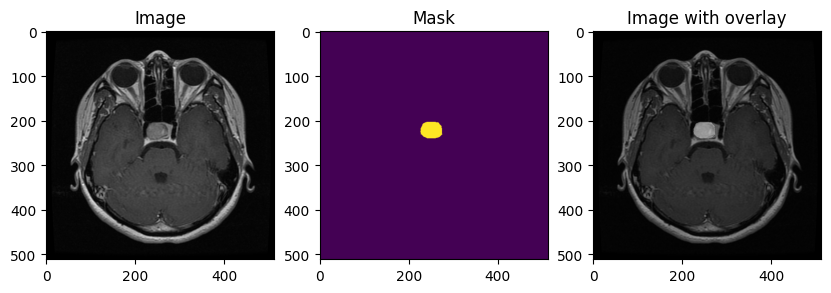

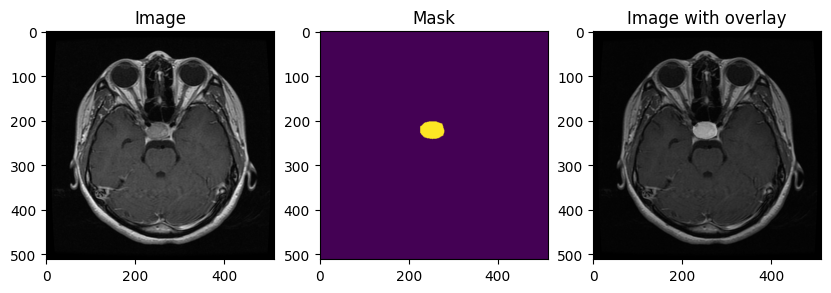

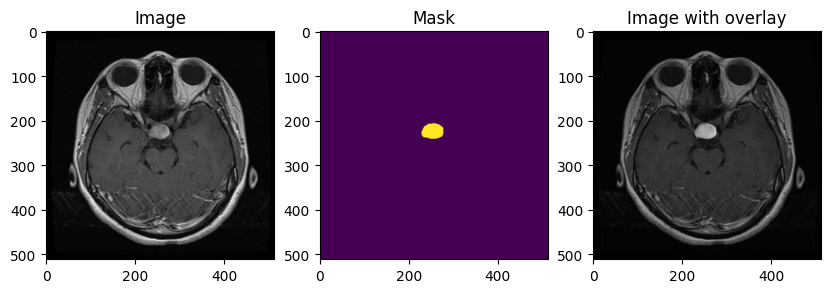

In [15]:
display_image_mask(image_path,mask_path)


In [ ]:
# images = list()
# masks = list()
# for fil in file:
#     with h5py.File(fil,'r') as f:
#         lbl = np.array(f['cjdata']['label']).flatten()
#         img = cv2.resize(np.array(f['cjdata']['image']), (256,256))
#         mask = lbl * cv2.resize(np.array(f['cjdata']['tumorMask']), (256,256))
#         images.append(img)
#         masks.append(mask)

# images = np.array(images)
# masks = np.array(masks)

In [ ]:
images_size=[]
masks_size=[]
#Check images shape
for image_file, mask_file in tqdm(zip(image_files, mask_files)):
    imagepath_full = os.path.join(image_path, image_file)
    maskpath_full = os.path.join(mask_path, mask_file)

    image = cv2.imread(imagepath_full)
    mask = cv2.imread(maskpath_full)

    images_size.append(image.shape)
    masks_size.append(mask.shape)

3052it [00:07, 398.52it/s]


In [17]:
print(list(set(images_size)))
print(list(set(masks_size)))

[(512, 512, 3), (256, 256, 3)]
[(512, 512, 3), (256, 256, 3)]


In [18]:
SIZE=224
CHANNEL=1

In [ ]:
# def preprocessing_images_masks():
#     images=[]
#     masks=[]
#
#     for image_file, mask_file in tqdm(zip(image_files,mask_files)):
#         imagepathfull=os.path.join(image_path,image_file)
#         maskpathfull=os.path.join(mask_path,mask_file)
#
#         image = cv2.imread(imagepathfull,cv2.IMREAD_GRAYSCALE)
#         image = cv2.resize(image,(SIZE,SIZE))
#         image=cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
#         image = image/255.0
#         images.append(image)
#
#         mask = cv2.imread(maskpathfull,cv2.IMREAD_GRAYSCALE)
#         mask = cv2.resize(mask,(SIZE,SIZE))
#         mask = mask/255.0
#         masks.append(mask)
#
#     return np.array(images), np.expand_dims(np.array(masks), axis=-1)

def preprocessing_images_masks(num_samples=None):
    images=[]
    masks=[]

   #use all images if sample is not defined
    if num_samples is not None:
        selected_image_files = image_files[:num_samples]
        selected_mask_files = mask_files[:num_samples]
    else:
        selected_image_files = image_files
        selected_mask_files = mask_files

    for image_file, mask_file in tqdm(zip(selected_image_files, selected_mask_files)):
        imagepathfull=os.path.join(image_path,image_file)
        maskpathfull=os.path.join(mask_path,mask_file)

        image = cv2.imread(imagepathfull,cv2.IMREAD_GRAYSCALE) #load img
        image = cv2.resize(image,(SIZE,SIZE))
        image=cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
        image = image/255.0   #normalizes pixel values 0-1
        images.append(image)

        mask = cv2.imread(maskpathfull,cv2.IMREAD_GRAYSCALE)
        mask = cv2.resize(mask,(SIZE,SIZE))
        mask = mask/255.0
        masks.append(mask)
    #add a channel to mask (depth of information per pixel(1))
    return np.array(images), np.expand_dims(np.array(masks), axis=-1)

In [20]:
# X,y=preprocessing_images_masks()

X,y=preprocessing_images_masks(num_samples=600)


600it [00:01, 371.39it/s]


In [21]:
print('Shape of X:',X.shape)
print('Shape of y:',y.shape)

Shape of X: (600, 224, 224, 3)
Shape of y: (600, 224, 224, 1)


In [22]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [23]:
print('The shape of X_train',X_train.shape)
print('The shape of y_train',y_train.shape)
print('The shape of X_test',X_test.shape)
print('The shape of y_test',y_test.shape)

The shape of X_train (480, 224, 224, 3)
The shape of y_train (480, 224, 224, 1)
The shape of X_test (120, 224, 224, 3)
The shape of y_test (120, 224, 224, 1)


In [ ]:
#avoid division by zero
smooth = 1e-15

#decor- save custom function with model
@register_keras_serializable()
#metric for overlap between prediction and ground truth
def dice_coef(y_true, y_pred):
    #convert multi dimensions to 1D
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)

    #common positive pixels
    intersection = tf.reduce_sum(y_true * y_pred)

    #balances TN and FP
    return (2. * intersection + smooth) / (
        tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth
    )

@register_keras_serializable()
#define loss function base one coef
def dice_loss(y_true, y_pred):
    #Reduce tumor mismatch
    return 1.0 - dice_coef(y_true, y_pred)


In [ ]:
smooth = 1e-15
@keras.saving.register_keras_serializable()
def dice_coef(y_true, y_pred):
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

In [ ]:
# log tensorflow informations
tf.debugging.set_log_device_placement(True)

In [ ]:
#data augmentation
train_datagen=(ImageDataGenerator
               (brightness_range=(0.9,1.1),#Randomly adjust brightness
               zoom_range=[.9,1.1],#Random zoom applied
               fill_mode='nearest') #Prevents unnatural
               )
val_datagen=ImageDataGenerator()

In [ ]:
# Check if GPU is available
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [ ]:
# Set memory growth to avoid OOM errors
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [ ]:
#extracts features and learn pattern from the input image
def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input) #learn patterns
    x = BatchNormalization()(x)  #stabilizes training
    x = Activation("relu")(x)    #network to learn complex features.(Introduces non-linearity)

    #combine learn pattern into meaningful region
    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

#increase resolution and merge encoder info in tumor mask
def decoder_block(input, skip_features, num_filters):
    #Upsampling (double spatial resolution)
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

# def build_resnet50_unet(input_shape):
#     """ Input """
#     inputs = Input(shape=input_shape)
#
#     """ Pre-trained ResNet50 Model """
#     resnet50 = ResNet50(include_top=False, weights="imagenet", input_tensor=inputs)
#
#     """ Encoder """
#     s1 = inputs                                         ## (224 x 224) - Use inputs directly
#     s2 = resnet50.get_layer("conv1_relu").output        ## (112 x 112)
#     s3 = resnet50.get_layer("conv2_block3_out").output  ## (56 x 56)
#     s4 = resnet50.get_layer("conv3_block4_out").output  ## (28 x 28)
#
#     """ Bridge """
#     b1 = resnet50.get_layer("conv4_block6_out").output  ## (14 x 14)
#
#     """ Decoder """
#     d1 = decoder_block(b1, s4, 512)                     ## (28 x 28)
#     d2 = decoder_block(d1, s3, 256)                     ## (56 x 56)
#     d3 = decoder_block(d2, s2, 128)                     ## (112 x 112)
#     d4 = decoder_block(d3, s1, 64)                      ## (224 x 224)
#
#     """ Output """
#     outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)
#
#     model = Model(inputs, outputs, name="ResNet50_U-Net")
#     return model
#
# input_shape = (224, 224, 3)
# model = build_resnet50_unet(input_shape)
# model.summary()


def build_light_resnet50_unet(input_shape):
    inputs = Input(shape=input_shape)
    resnet50 = ResNet50(include_top=False, weights="imagenet", input_tensor=inputs)

    # Encoder (skip connections)
    s1 = inputs                                      # 224 x 224 x 3
    s2 = resnet50.get_layer("conv1_relu").output     # 112 x 112 x 64
    s3 = resnet50.get_layer("conv2_block3_out").output  # 56 x 56 x 256

    # Bridge(compressed view)
    b1 = resnet50.get_layer("conv3_block4_out").output  # 28 x 28 x 512

    # Decoder
    d1 = decoder_block(b1, s3, 128)   # 56 x 56
    d2 = decoder_block(d1, s2, 64)    # 112 x 112
    d3 = decoder_block(d2, s1, 32)    # 224 x 224

    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d3)

    model = Model(inputs, outputs, name="LightResNet50_U-Net")
    return model


input_shape = (224, 224, 3)
model = build_light_resnet50_unet(input_shape)
model.summary()

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FloorMod in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomGetKeyCounter in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op StatelessRandomUniformV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:loca

Model: "LightResNet50_U-Net"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 2,485,409 (9.48 MB)

 Trainable params: 2,474,401 (9.44 MB)

 Non-trainable params: 11,008 (43.00 KB)

----------------------

In [ ]:
# def conv_block(input, num_filters):
#     x = Conv2D(num_filters, 3, padding="same")(input)
#     x = BatchNormalization()(x)
#     x = Activation("relu")(x)
#
#     x = Conv2D(num_filters, 3, padding="same")(x)
#     x = BatchNormalization()(x)
#     x = Activation("relu")(x)
#
#     return x
#
# def decoder_block(input, skip_features, num_filters):
#     x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
#     x = Concatenate()([x, skip_features])
#     x = conv_block(x, num_filters)
#     return x
#
# def build_resnet50_unet(input_shape):
#     """ Input """
#     inputs = Input(shape=input_shape)
#
#     """ Pre-trained ResNet50 Model """
#     resnet50 = ResNet50(include_top=False, weights="imagenet", input_tensor=inputs)
#
#     """ Encoder """
#     s1 = resnet50.get_layer("input_layer").output           ## (512 x 512)
#     s2 = resnet50.get_layer("conv1_relu").output        ## (256 x 256)
#     s3 = resnet50.get_layer("conv2_block3_out").output  ## (128 x 128)
#     s4 = resnet50.get_layer("conv3_block4_out").output  ## (64 x 64)
#
#     """ Bridge """
#     b1 = resnet50.get_layer("conv4_block6_out").output  ## (32 x 32)
#
#     """ Decoder """
#     d1 = decoder_block(b1, s4, 512)                     ## (64 x 64)
#     d2 = decoder_block(d1, s3, 256)                     ## (128 x 128)
#     d3 = decoder_block(d2, s2, 128)                     ## (256 x 256)
#     d4 = decoder_block(d3, s1, 64)                      ## (512 x 512)
#
#     """ Output """
#     outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)
#
#     model = Model(inputs, outputs, name="ResNet50_U-Net")
#     return model
#
# input_shape = (224,224, 3)
# model = build_resnet50_unet(input_shape)
# model.summary()

In [37]:
model_checkpoint  = ModelCheckpoint('best_model_checkpoint.keras', save_best_only=True,
                                    monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')
reduceLR = ReduceLROnPlateau(patience=4, verbose=2, monitor='val_loss',min_lr=1e-4, mode='min')

callback_list = [early_stopping, reduceLR, model_checkpoint]

In [38]:
batch_size = 16

train_generator = train_datagen.flow( X_train, y_train, batch_size=batch_size, shuffle=True)

val_generator = val_datagen.flow(X_test, y_test, batch_size=batch_size, shuffle=False)

In [39]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss=dice_loss,
              metrics=[dice_coef, 'accuracy'])

Executing op Cast in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:l

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

tf.debugging.set_log_device_placement(True)
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
cpus = tf.config.experimental.list_physical_devices('CPU')
print(cpus)
devices = tf.config.get_visible_devices()
print(devices)

In [ ]:
history = model.fit(
    X_train, y_train,
    batch_size=4,  # Reduced from 32 to 4
    epochs=100,
    validation_data=(X_test, y_test),
    verbose=1,
    callbacks=callback_list
)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Pr

In [ ]:
# history = model.fit(
    # X_train, y_train, batch_size=32, epochs=100,validation_data=(X_test, y_test),verbose=1,callbacks=callback_list)

In [41]:
model.save('resnet50_trained_model_batch_size_4.keras')


Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /j

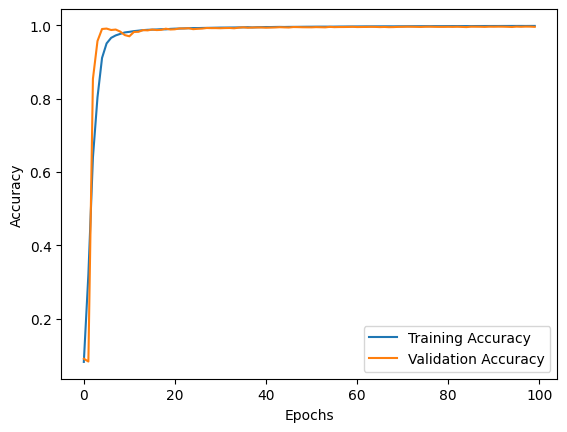

In [42]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

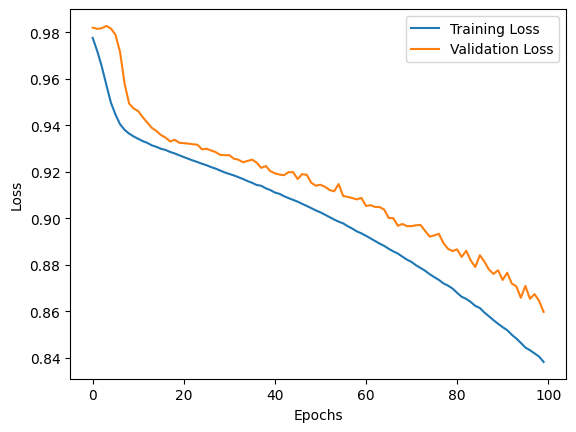

In [43]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
loss,dice_coef,accuracy=model.evaluate(X_test,y_test)
print(f'Loss is {loss}')
print(f'Accuracy is {accuracy}')
print(f'Dice_Coef is {dice_coef}')

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Pr

In [45]:
model.save("unet_resnet50_backbone.keras")


Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Identity in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /j

In [46]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(np.uint8)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing o

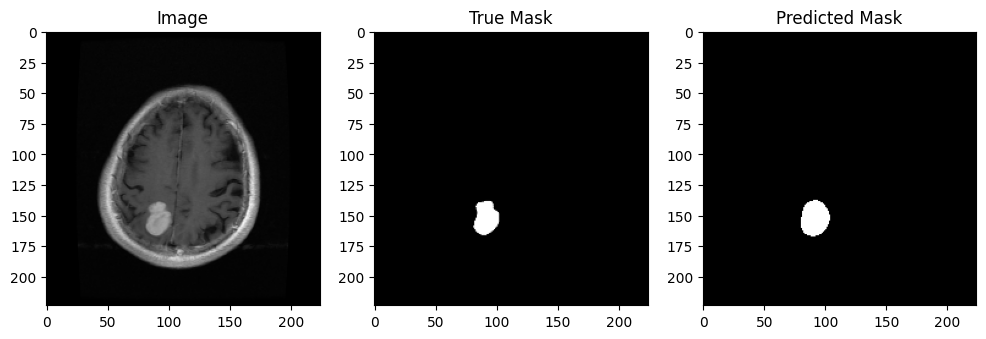

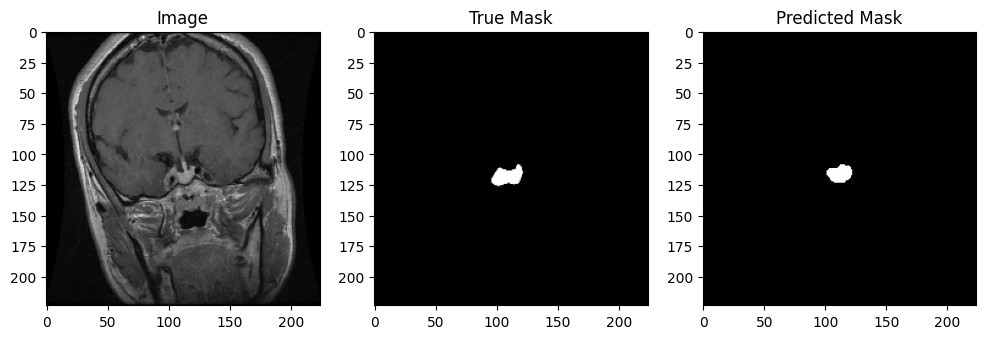

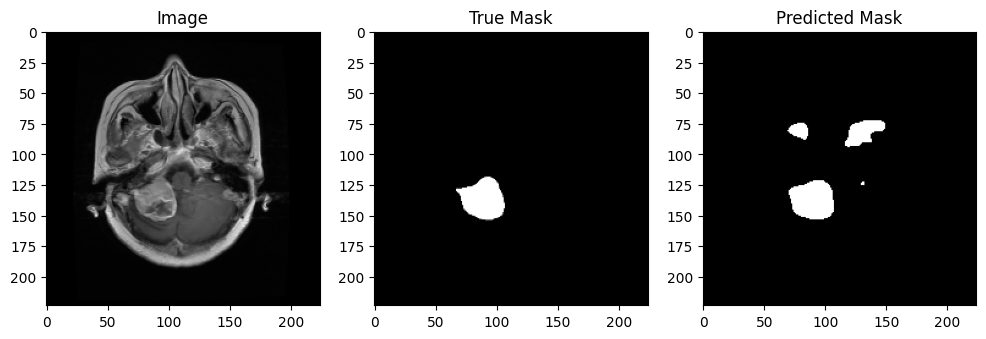

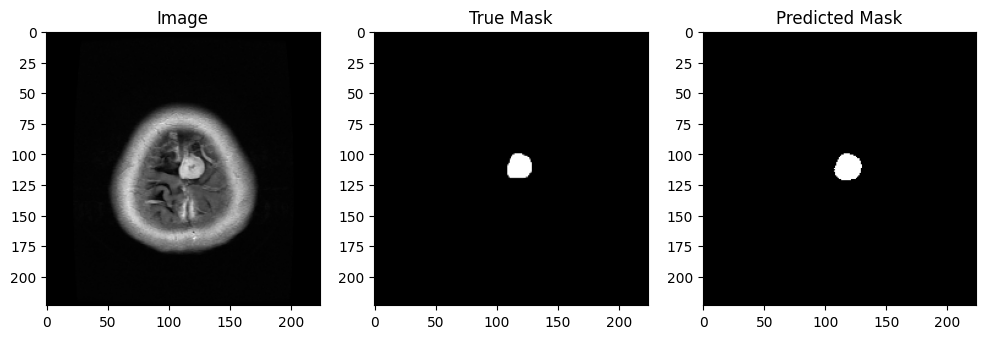

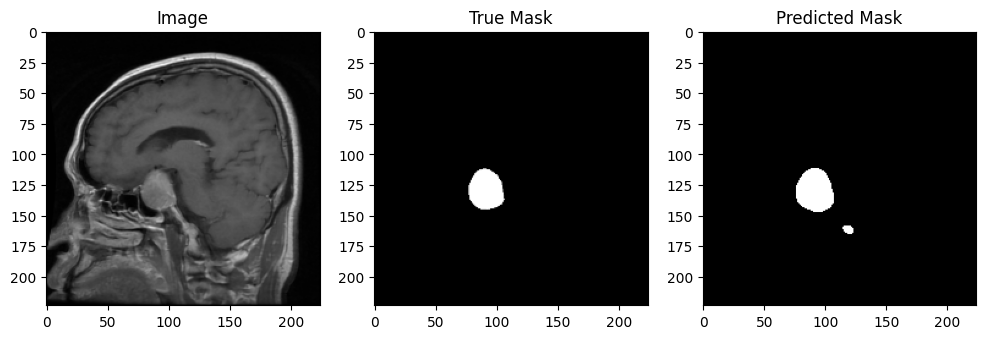

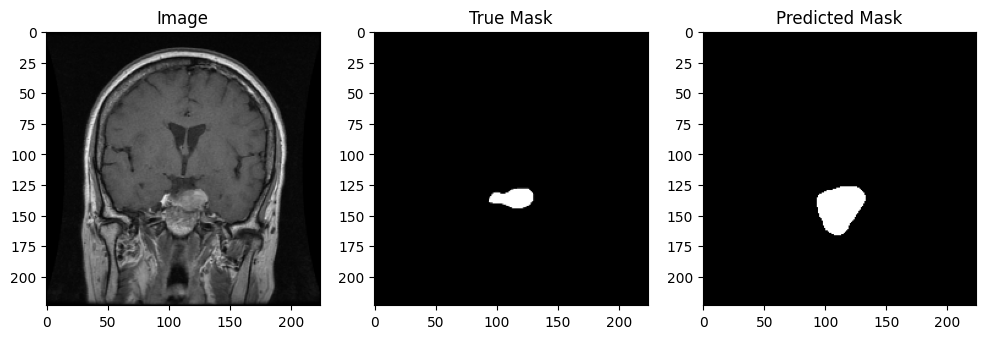

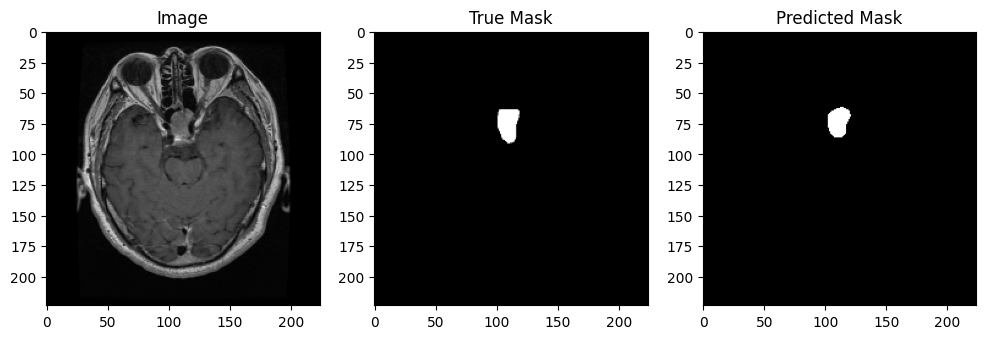

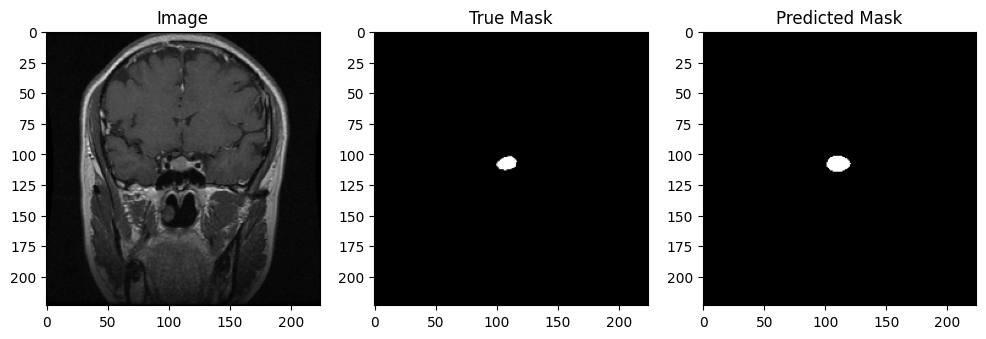

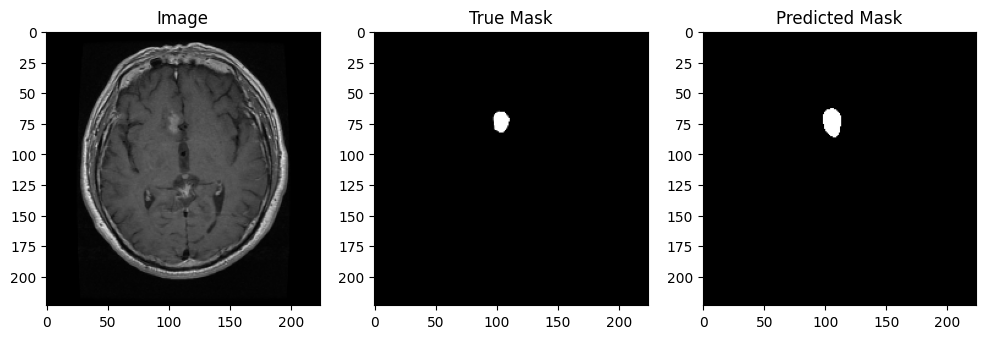

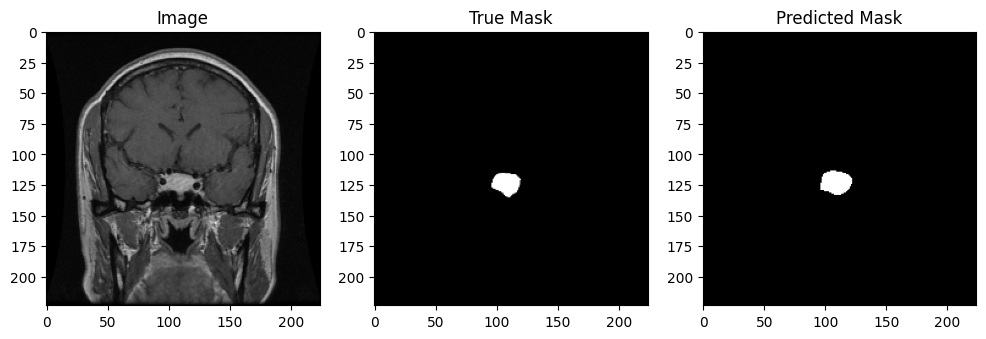

In [47]:
for i in range(10):

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.title("Image")
    plt.imshow(X_test[i],cmap='gray')

    plt.subplot(1, 3, 2)
    plt.title("True Mask")
    plt.imshow(y_test[i].squeeze(), cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(y_pred[i].squeeze(), cmap='gray')

    plt.show()